In [7]:
# 1. Importação das bibliotecas necessárias
# Bibliotecas gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from modelos import *


In [8]:
def carregar_e_preparar_dados(caminho_csv, coluna_target):
    """
    Função para carregar o dataset e separar em X (features) e y (rótulo).

    Args:
    - caminho_csv: caminho do arquivo CSV
    - coluna_target: nome da coluna que representa o rótulo

    Returns:
    - X_train, X_test, y_train, y_test: conjuntos de treino e teste
    """

    cols = ['NU_ANO','TP_FAIXA_ETARIA', 'TP_DEPENDENCIA_ADM_ESC', 
        'NPessoas', 'Escolaridade_Pai', 'Escolaridade_Mae', 'Renda', 'Computador',
        'Celular', 'Internet', f'{coluna_target}']

    #selecionando as colunas relevantes
    cols = ['NU_ANO','TP_FAIXA_ETARIA', 'TP_DEPENDENCIA_ADM_ESC', 
        'NPessoas', 'Escolaridade_Pai', 'Escolaridade_Mae', 'Renda', 'Computador',
        'Celular', 'Internet', f'{coluna_target}']

    df = pd.read_csv(caminho_csv, sep=',', usecols=cols)
    df = df[df['NU_ANO']> 2021]
    df = df.drop(columns=['NU_ANO'])

    oneHotdata = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    oneHotdata = oneHotdata.fit_transform(df[['TP_DEPENDENCIA_ADM_ESC']])
    df = pd.concat([df, oneHotdata], axis=1)
    df = df.drop(columns=['TP_DEPENDENCIA_ADM_ESC'])
    novos_nomes = {
        'TP_DEPENDENCIA_ADM_ESC_1': 'Federal',
        'TP_DEPENDENCIA_ADM_ESC_2': 'Estadual',
        'TP_DEPENDENCIA_ADM_ESC_3': 'Municipal',
        'TP_DEPENDENCIA_ADM_ESC_4': 'Privada',
    }
    df.rename(columns=novos_nomes, inplace=True)

    # Balanceando o conjunto de dados para ter 50% de cada rótulo
    df_0 = df[df[coluna_target] == 0]
    df_1 = df[df[coluna_target] == 1]
    
    #FAZENDO BALANEAMENTO DOS DADOS
    min_size = min(len(df_0), len(df_1))
    print(min_size)
    df_0 = df_0.sample(n=min_size, random_state=42)
    df_1 = df_1.sample(n=min_size, random_state=42)
    
    # Concatenando os dois grupos balanceados
    df = pd.concat([df_0, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)
    df.dropna(inplace=True)

    # Separando variáveis independentes e dependente
    X = df.drop(columns=[coluna_target])
    y = df[coluna_target]#pd.get_dummies(df[coluna_target], prefix=coluna_target)


    # Dividindo em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    #Normalização
    scaler = MinMaxScaler()
    X_train['TP_FAIXA_ETARIA'] = scaler.fit_transform(X_train[['TP_FAIXA_ETARIA']])
    X_test['TP_FAIXA_ETARIA'] = scaler.transform(X_test[['TP_FAIXA_ETARIA']])   #aqui não vai o fit, pois o teste não pode colar do treino
                    
    X_train['Renda'] = scaler.fit_transform(X_train[['Renda']])
    X_test['Renda'] = scaler.transform(X_test[['Renda']])   #aqui não vai o fit, pois o teste não pode colar do treino
                    
    X_train['NPessoas'] = scaler.fit_transform(X_train[['NPessoas']])
    X_test['NPessoas'] = scaler.transform(X_test[['NPessoas']])   #aqui não vai o fit, pois o teste não pode colar do treino
              
    X_train['Escolaridade_Mae'] = scaler.fit_transform(X_train[['Escolaridade_Mae']])
    X_test['Escolaridade_Mae'] = scaler.transform(X_test[['Escolaridade_Mae']])   #aqui não vai o fit, pois o teste não pode colar do treino

    X_train['Escolaridade_Pai'] = scaler.fit_transform(X_train[['Escolaridade_Pai']])
    X_test['Escolaridade_Pai'] = scaler.transform(X_test[['Escolaridade_Pai']])   #aqui não vai o fit, pois o teste não pode colar do treino


    return X_train, X_test, y_train, y_test, df

In [9]:
file = 'Data/enem_2011_2023.csv'  # Substitua pelo caminho do seu arquivo CSVASD

X_train, X_test, y_train, y_test, df = carregar_e_preparar_dados(file, 'Desempenho')
X_train

11043


,TP_FAIXA_ETARIA,NPessoas,Escolaridade_Pai,Escolaridade_Mae,Renda,Computador,Celular,Internet,Federal,Estadual,Municipal,Privada
6253,0.000000,0.105263,0.666667,0.666667,0.05,1,1,1,0.0,1.0,0.0,0.0
6241,0.058824,0.263158,0.833333,0.833333,0.40,1,1,1,0.0,0.0,0.0,1.0
17233,0.117647,0.210526,0.333333,0.666667,0.05,0,1,1,0.0,1.0,0.0,0.0
11562,0.058824,0.157895,0.166667,0.500000,0.05,0,1,1,0.0,1.0,0.0,0.0
1277,0.058824,0.157895,0.333333,0.500000,0.05,0,1,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.117647,0.157895,0.166667,0.166667,0.05,0,1,1,0.0,1.0,0.0,0.0
21575,0.058824,0.210526,0.833333,1.000000,0.75,1,1,1,0.0,0.0,0.0,1.0
5390,0.117647,0.157895,0.166667,0.166667,0.05,0,1,0,0.0,1.0,0.0,0.0
860,0.117647,0.157895,0.166667,0.166667,0.05,0,1,1,0.0,1.0,0.0,0.0


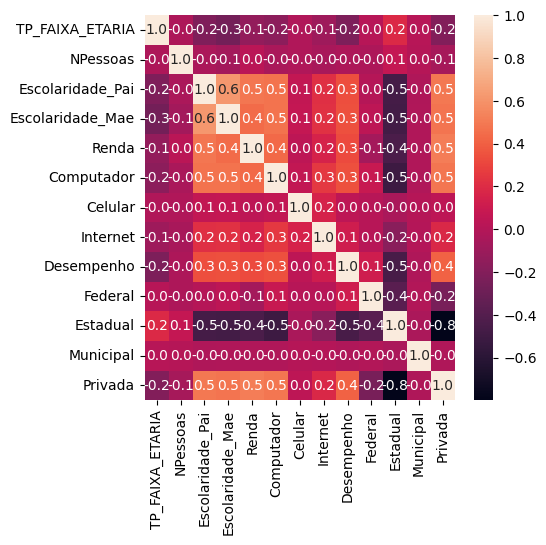

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

### PRIMEIRO VEJO AQUI, QUAL A PROFUNDIDADE IDEAL PARA NÃO OCORRER OVERFIT

max_depth tested:  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  

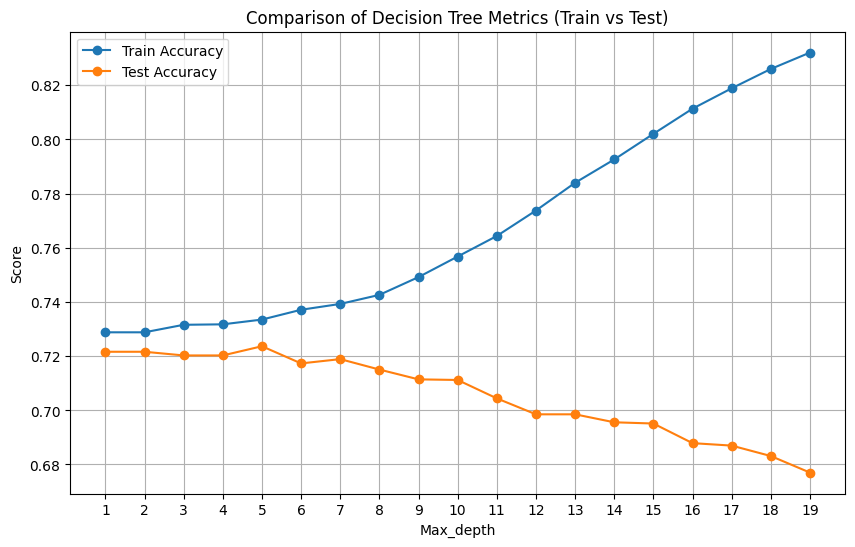

Best max_depth_tree: 5
Metrics for best max_depth: {'train_accuracy': 0.7334729454380802, 'test_accuracy': 0.7236306020823903, 'precision': 0.7238198196233422, 'recall': 0.7236306020823903, 'f1': 0.7235051374111936}


(5,
 {'train_accuracy': 0.7334729454380802,
  'test_accuracy': 0.7236306020823903,
  'precision': 0.7238198196233422,
  'recall': 0.7236306020823903,
  'f1': 0.7235051374111936})

In [11]:
best_depth_for_tree(X_train, X_test, y_train, y_test)

### APLICANDO  A ÁRVORE

Árvores de decisão nos ajudam a visualizar dados linearmente não separáveis

Árvore de Decisão Otimizada
Melhor alpha: 0.0012450110218747562
Ein: 0.2685
Eout: 0.2798

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      2228
           1       0.76      0.64      0.69      2190

    accuracy                           0.72      4418
   macro avg       0.73      0.72      0.72      4418
weighted avg       0.73      0.72      0.72      4418

A profundidade da árvore para o melhor alpha é: 4


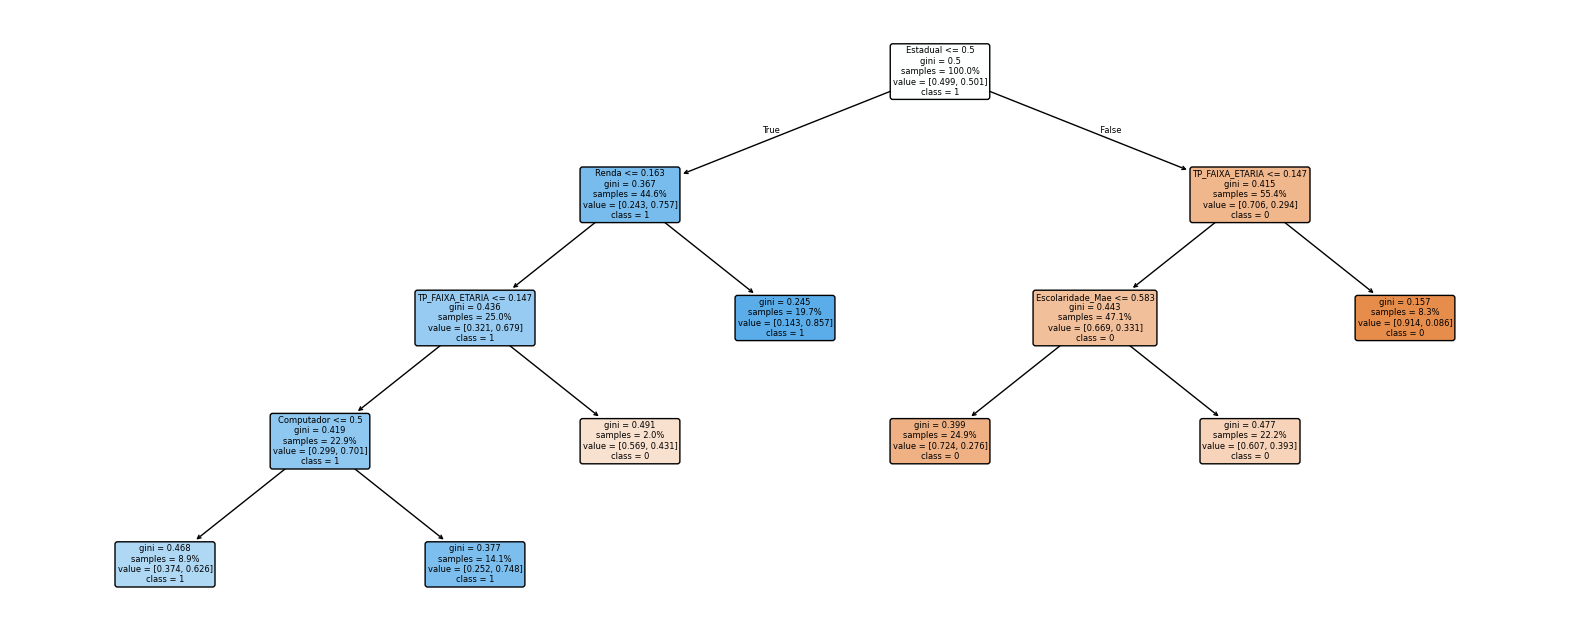

DecisionTreeClassifier(ccp_alpha=np.float64(0.0012450110218747562),
                       random_state=0)

In [12]:
modelo_arvore_decisao(X_train, X_test, y_train, y_test)

# SVM

SVM - Resultados
Melhores parâmetros: {'C': 1000, 'gamma': 0.1}
Erro de treino (Ein): 0.2692
Erro de teste (Eout): 0.2777
Número total de vetores de suporte: 9735

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      2228
           1       0.75      0.66      0.70      2190

    accuracy                           0.72      4418
   macro avg       0.73      0.72      0.72      4418
weighted avg       0.73      0.72      0.72      4418



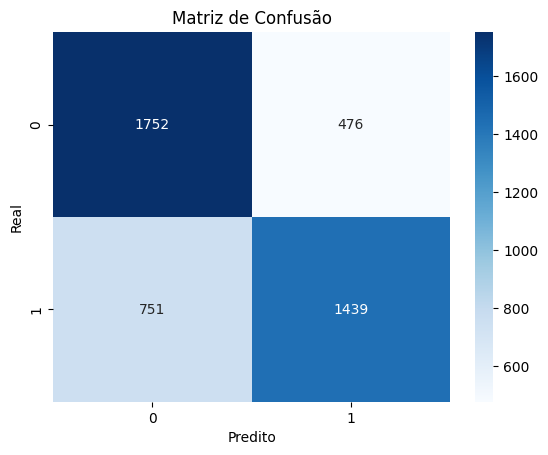

SVC(C=1000, gamma=0.1, random_state=0)

In [13]:
modelo_svm(X_train, X_test, y_train, y_test)

# REDES NEURAIS

Usamos o cálculo da dimensão VC para justificar a escolha da arquitetura da Rede Neural: 
    - Nº de Camadas
    - Nº de Neurônios
    

Cálculo do Nº de Neurônios:


In [14]:
def num_neurons(n_examples, n_features):
    return int((n_examples - 10) / (10 * (n_features + 2) ))

In [15]:
N = len(X_train)
n_variaveis = X_train.shape[1]
print(X_train.shape)

print('Nº máximo de neurônios:')
print(num_neurons(N, n_variaveis))

(17668, 12)
Nº máximo de neurônios:
126


In [16]:
output_dim = len(np.unique(y_train))
output_dim

2

c:\GitMaria\MachineLearning\FinalProject\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


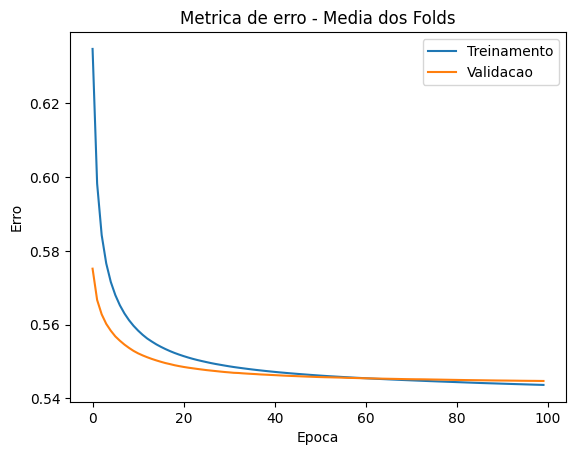

--> Acuracia (treino): 0.7343
--> Acuracia (validacao): 0.7330
--> E_in = 0.5395
--> E_val = 0.5433
--> E_val - E_in = 0.0038
--> acc_in - acc_val = 0.0013

--> E_out = 0.5487
--> Acuracia (teste): 0.7243
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      2228
           1       0.75      0.66      0.70      2190

    accuracy                           0.72      4418
   macro avg       0.73      0.72      0.72      4418
weighted avg       0.73      0.72      0.72      4418



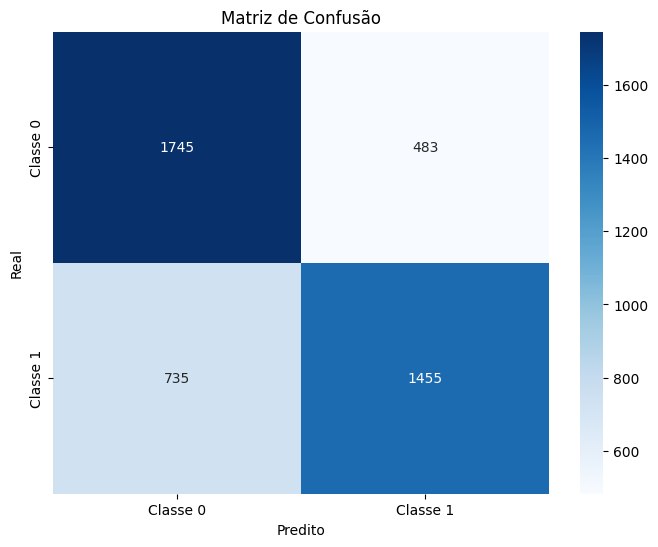

<Sequential name=sequential_4, built=True>

In [17]:
input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))
n_neuronios = num_neurons(N, n_variaveis)
modelo_rede_neural(X_train, X_test, y_train, y_test, input_dim, output_dim, n_neuronios)